# Classification of a Point following a 2D Line
The goal is to decide if a tuple **(x,y)** is above/under the a generic 2D Line ( for this test as been used **y = x** ) in the cartesian plane.<br>
Has been implemented a single **Neuron**, which:
- get the two coordinates as input x,y
- gives as output the probability of being above the line

The *"Loss-in-Time Curve"*, the *"Difference True-Result Curve"* and the *"Neuron Classes"* will be plot after the Training.

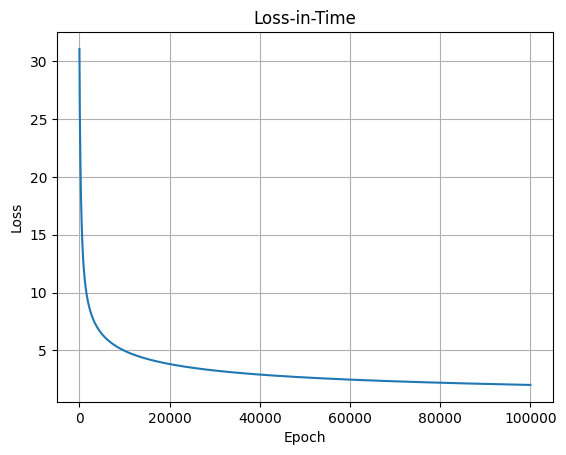

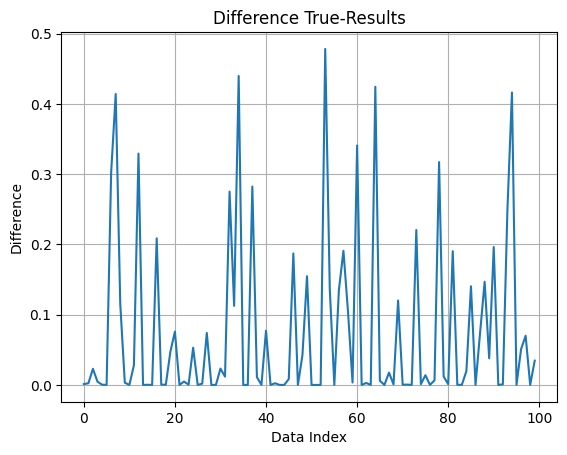

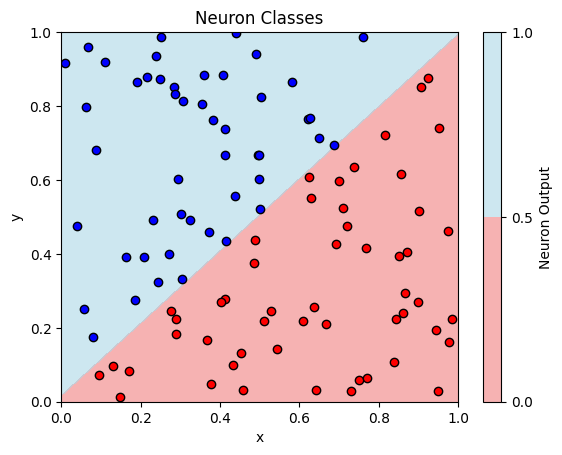

In [ ]:
# import packages
import sys
import os
import random
import matplotlib.pyplot as plt
import numpy as np

# get path for Neuron
parent_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("Line_2D.ipynb"))))
sys.path.insert(0, parent_dir)

# Neuron import
import Neuron


# ------------------------------------------------ TRAIN THE NEURAL NETWORK ------------------------------------------------

# generate the Test-Set --- range[0,1]
data = []
sol = []
for _ in range(100):
    x0 = random.random()
    x1 = random.random()
    y = 1 if x0 < x1 else 0
    sol.append(y)
    data.append(([x0, x1], [y]))

# train the Neuron
layer_list = []
layer_list.append(Neuron.Layer(1,2))
nr = Neuron.Network(layer_list)
loss = nr.train(data, 100000)

# plot the Loss-in-Time
plt.plot(loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss-in-Time")
plt.grid(True)
plt.show()

# get after-train results
result = []
diff = []
for input, target in data:
    new_res = nr.forward(input)
    result.append(new_res)
    diff.append(abs(target[0] - new_res[0]))

# plot the Difference True-Results
plt.plot(diff)
plt.xlabel("Data Index")
plt.ylabel("Difference")
plt.title("Difference True-Results")
plt.grid(True)
plt.show()


# ---------------------------------------------------- PLOT THE CLASSES ----------------------------------------------------

# Plot the Decision Boundary
grid_x, grid_y = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
grid_res = np.zeros_like(grid_x)
for i in range(10):
    for j in range(10):
        res = nr.forward([grid_x[i,j], grid_y[i,j]])
        grid_res[i,j] = res[0]

plt.figure()
plt.contourf(grid_x, grid_y, grid_res, levels=[0,0.5,1], colors=['lightcoral','lightblue'], alpha=0.6)
plt.colorbar(label="Neuron Output")


# Plot the original Data-Set
for x, y in data:
    color = 'blue' if y[0] == 1 else 'red'
    plt.scatter(x[0], x[1], color=color, edgecolor='k')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Neuron Classes")
plt.show()